# Numerische Verifizierung der iterativen Lösung von linearen, algebraischen Gleichungssystemen

In [1]:
# wie immer, lass uns einige wichtige Module importieren
import numpy as np
from matplotlib import pyplot as plt
import scipy.linalg as lin           

---

## Aufgabe 10.1

In der vorliegenden Übung konzentrieren wir uns auf die zweidimensionale Poisson-Gleichung 

\begin{equation}
    \phi_{/xx} + \phi_{/yy} = f(x,y)  \, \qquad \qquad (1)
    \label{eq:poisson}
\end{equation}

so wie sie in der Druckkorrekturgleichung während der Lösung der Navier--Stokes Gleichungen vorkommen kann. Die Gleichung ist definiert im Raum $(x,y) \in [0,L_x] \times [0,L_y]$. Der Einfachheit halber benutzen wir die Dirichlet-Randbedingung $\left. \phi \right|_{\text{Rand}} = 0$ entlang des gesamten Randes im Gegensatz zur Druckkorrekturgleichung, für die die besondere Randbedingung diskutiert in Vorlesung 10 gilt. 

Nachdem Sie die Gleichung (1) diskretisiert haben und in ein Gleichungsystem der Form $\mathsf{A}\mathbf{u} = \mathbf{b}$ überführt haben, implementieren Sie eine Funktion, welche die Systemmatrix $\mathsf{A}$ des vorliegenden Gleichungssystem für gegebene Werte von $L_x$, $L_y$ und $N_x$, $N_y$ herstellt. Rufen Sie die Funktion mit $L_x=L_y=1$ und $N_x=N_y=10$. Stellen Sie die Struktur der Matrix $\mathsf{A}$ dar. Entspricht sie Ihrer Erwartung aus Teilaufgabe b)?

In [4]:
# Funktion zur Herstellung der Matrix A 
# für gegebene Größe (Lx,Ly) des Rechengebiets
# und Anzahl von Punkten (Nx, Ny) 
# in den jeweiligen Raumrichtungen
def Poisson_Matrix(Lx,Ly,Nx,Ny):

        # Gitterweite
        dx = Lx/(Nx-1)
        dy = Ly/(Ny-1)

        # Größe der Matrix A
        NN = Nx*Ny

        # Koeffizienten in der Matrix A
        phi_x = dy**2 / (2*(dx**2 + dy**2)) 
        phi_y = dx**2 / (2*(dx**2 + dy**2)) 

        # Wir können jetzt z.B. mit diag-Befehle
        # die Matrix A definieren
        A = (np.diag( np.ones(NN),k=0)             +     
             np.diag( -phi_x*np.ones(NN-1),k=-1)   +
             np.diag( -phi_x*np.ones(NN-1),k= 1)   +
             np.diag( -phi_y*np.ones(NN-Nx),k=-Nx) +
             np.diag( -phi_y*np.ones(NN-Nx),k=+Nx) )
        
        # Wir müssen jetzt die Matrix A
        # entsprechend der Randbedingungen ändern
        for ix in range(Nx):
            for iy in range(Ny):
                if ix==0 or ix==Nx-1 or iy==0 or iy==Ny-1:
                    i = Nx*ix + iy
                    A[i,:] = 0; A[i,i]=1
                
        
        return A, NN
    
# Let's use the function to generate one instance
# of the matrix A with some randomaly-chosen parameters
A, NN = Poisson_Matrix(Lx=1,Ly=1,Nx=10,Ny=10)

Stellen Sie die Struktur der Matrix $\mathsf{A}$ dar. Entspricht sie Ihrer Erwartung aus Teilaufgabe b)?

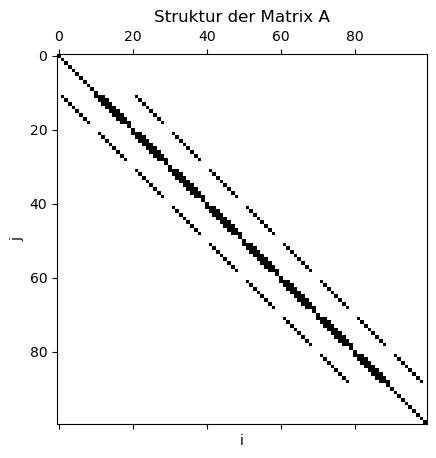

In [6]:
# Wir öffnen eine neue Abbildung
plt.figure()
# Wir geben der Abbildung einen Titel
plt.title('Struktur der Matrix A')
# Wir stellen die Struktur dar
plt.spy(A)
# Wir beschriften die Achsen
plt.xlabel('i')
plt.ylabel('j')
plt.show()

Nun können wir den Spektralradius und die Konvergenzrate für die Jacobi- und Gauß-Seidel-Methoden berechnen. 

Ein allgemeines iteratives Verfahren ist definiert als 

$$\mathsf{N}\mathbf{u}^{(k)}=\mathsf{P}\mathbf{u}^{(k-1)} + \mathbf{b}$$

wobei $\mathsf{P}=\mathsf{N}-\mathsf{A}$, und $\mathsf{N}$ je nach der betrachteten Methode unterschiedlich gewählt wird. Insbesondere

* $\mathsf{N}=\mathsf{I}$ für die Jacobi-Methode
* $\mathsf{N}=\mathsf{L}$, wobei $\mathsf{L}$ die untere Dreieckmatrix von $\mathsf{A}$ für die Gauß-Seidel-Methode ist

Die Stabilität des Verfahrens wird durch die Eigenwerte der Verstärkungsmatrix $\mathsf{G=N^{-1}P}$ bestimmt. Insbesondere muss der Spektralradius $\rho(\mathsf{G})$ kleiner als eins sein ($\rho(\mathsf{G})<1$), damit das Verfahren konvergiert, wobei $\rho(\mathsf{G})$ der absolute Wert des größten Eigenwerts von $\rho(\mathsf{G})$ ist, d.h. 

$$ \rho(\mathsf{G}) = \max_i \left| \lambda_i(\mathsf{G})\right|$$

Sobald $\rho(\mathsf{G})$ bestimmt ist, ist die Konvergenzrate

$$ R = -\log_{10} [\rho(\mathsf{G})]$$ 

kann ebenfalls leicht bestimmt werden.

In [9]:
# Jacobi Methode: Spektralradius 
N = np.eye(NN)           # Wir stellen die Matrix N her
G = lin.inv(N)@(N-A)     # Wir berechnen G
sigma = lin.eigvals(G)   # Wir berechnen die Eigenwerte von G durch die Funktion lin.eigvals
rho = np.max(np.abs(sigma))    # ...und daraus den Spektralradius
# Wir schreiben den Spektralradius am Bildschirm
print('Der Spektralradius für die Jacobi Mehtode ist:', rho)

Der Spektralradius für die Jacobi Mehtode ist: 0.939692620785911


In [10]:
# Gauss-Seidel Methode: Spektralradius 
N = np.tril(A)           # Wir stellen die Matrix N her
G = lin.inv(N)@(N-A)     # Wir berechnen G
sigma = lin.eigvals(G)   # Wir berechnen die Eigenwerte von G durch die Funktion lin.eigvals
rho = np.max(np.abs(sigma))    # ...und daraus den Spektralradius
print('Der Spektralradius für die Gauss-Seidel Mehtode ist:', rho)

Der Spektralradius für die Gauss-Seidel Mehtode ist: 0.8830222215594914


Berechnen Sie die Konvergenzrate $R = - \log_{10}(\rho)$ der Jacobi und Gauss-Seidel Methoden für eine zunehmende Anzahl an Gitterpunkten $N_x = N_y = \{5,10,15,20,25,30,35,40,50,60,70\}$. Wie ändert sich die Konvergenzrate als Funktion von $N=N_x=N_y$? 

In [11]:
# Wir definieren den Vektor der N=Nx=Ny-Werte
N = np.asarray([5,10,15,20,25,30,35,40,50,60,70])
# Wir definieren Listen, um die Spektralradii zu speichern
rho_Jacobi = list()              # für Jacobi
rho_GaussSeidel = list()         # für Gauss-Seidel
# For-Schleife über alle N-Werte
for iN in N:
    # Jacobi
    A, NN = Poisson_Matrix(Lx=1,Ly=1,Nx=iN,Ny=iN)    # Berechnung der Systemmatrix
    Nmat = np.eye(NN)                                # Berechnung der Matrix N
    G = lin.inv(Nmat)@(Nmat-A)                       # Berechnung der Matrix G
    sigma = lin.eigvals(G)                           # Berechnung der Eigenwerte
    rho_Jacobi.append(np.max(np.abs(sigma)))         # Berechnung des Spektralradius
    # Gauss-Seidel 
    Nmat = np.tril(A)                                # Berechnung der Matrix N
    G = lin.inv(Nmat)@(Nmat-A)                       # Berechnung der Matrix G
    sigma = lin.eigvals(G)                           # Berechnung der Eigenwerte
    rho_GaussSeidel.append(np.max(np.abs(sigma)))    # Berechnung des Spektralradius

Stellen Sie die Konvergenzrate als Funktion von $N$ graphisch dar. Wie stehen die Konvergenzrate von Jacobi und Gauss-Seidel im Verhältnis? Entspricht Ihr Ergebnis Ihrem Wissen aus der Vorlesung 13?

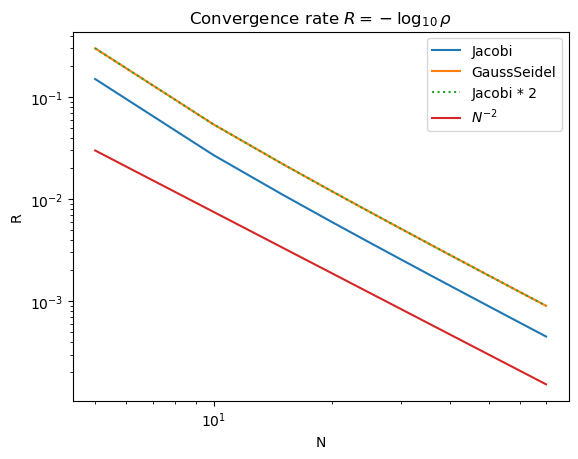

In [13]:
# Wir öffnen eine Abbildung
plt.figure()
# Wir geben der Abbildung einen Titel
plt.title(r'Convergence rate $R = -\log_{10} \rho$')
# Wir plotten auf logarithmische Skala die Konvergenzrate des Jacobi-Verfarhens
plt.loglog(N,-np.log10(rho_Jacobi), label='Jacobi')
# Wir plotten auf logarithmische Skala die Konvergenzrate des Gauss-Seidel-Verfarhens
plt.loglog(N,-np.log10(rho_GaussSeidel), label='GaussSeidel')
# Zum Vergleichen plotten wir auch das zweifache von der Jacobi-Konvergenzrate (gestrichelt)
plt.loglog(N,-2*np.log10(rho_Jacobi), ':', label='Jacobi * 2')
# Zum Vergleichen plotten wir auch das Gesetz N^-2
plt.loglog(N,0.75*np.asarray(N)**(-2.0), label=r'$N^{-2}$')
# Wir beschriften die Achsen
plt.xlabel('N')
plt.ylabel('R')
# und zeigen eine Legende
plt.legend()
plt.show()

### Aufgabe 10.2

Die voll-entwickelte, laminare Strömung in einem Rohr beliebiges aber entlang der Rohachse konstanten Querschnitts ist von der folgenden zweidimensionalen Laplace-Gleichung beschrieben:

\begin{equation}
    \nu(u_{/yy} + u_{/zz}) = \Pi_x \, ,   \qquad \qquad (1)
\end{equation}

wobei $\Pi_x$ einen räumlich und zeitlich konstanten Druckgradienten ist, während $u$ die Geschwindigkeitskomponente entlang der Rohrachse ($x$-Richtung) und $\nu$ die kinematische Viskosität ist. Wir betrachten eine Luftströmung ($\nu=1.5 \cdot 10^{-5}\,\,\mathrm{m^2/s}$, $\rho=1 \,\,\mathrm{Kg/m^3}$), welche von einem Druckgradienten von $\Pi_x = 10^{-2}\,\,\mathrm{Pa/m}$ getrieben wird. 

Nachdem Sie die Gleichung (1) mit zentralen finiten Differenzen zweiter Ordnung \'a $N_x=N_y$ Punkten in den jeweiligen Raumrichtungen diskretisiert haben, überführen Sie numerisch die diskretisierte Gleichung in ein lineares, algebraisches Gleichungssystem der Form $\mathsf{A}\mathbf{u} = \mathbf{b}$ für das vorliegende Rohr mit dem ringförmigen, viereckigen Querschnitt (siehe Übungsblatt). Achten Sie darauf, dass die Strömung in dem zentralen Teil des Rohres nicht strömen kann. An allen Wänden herrscht die Haftbedingung. Die Ma\ss e des Rohes sind $L_x = L_y = 1 \,\,\mathrm{m}$. Stellen Sie die Struktur der Matrix $\mathsf{A}$ dar.

In [17]:
# EINGABEN
# -----------------------------
n = 20            # Anzahl von Punkten "n"
m = 21            # Anzahl von Punkten "m"
Lz = 1            # Länge des Gebiets in z-Richtung   [m]
Ly = 1            # Länge des Gebiets in y-Richtung   [m]
Px = -1e-3        # Druckgradienten in x-Richtung     [Pa/m]
nu = 1.5e-5       # kinematische Viskosität           [m^2/s]
rho = 1           # Dichte                            [kg/m^3]

# BERECHNETE GRÖßEN
# -----------------------------
Nz = 2*n+m                                  # Anzahl von Punkten in z-Richtung
Ny = 2*n+m                                  # Anzahl von Punkten in y-Richtung
z = np.linspace(0,Lz,Nz); dz = z[1]-z[0]    # Vektor der z-Koordinate und z-Gitterweite
y = np.linspace(0,Ly,Ny); dy = y[1]-y[0]    # Vektor der y-Koordinate und y-Gitterweite
NN = (2*n+m)**2                             # Gesmte Größe der Systemmatrix
A = np.zeros([NN,NN])                       # Systemmatrix A
b = np.zeros([NN])                          # Vektor der rechten Seite b
# Koeffizienten für die Matrix A
phi_z = dy**2 / (2*(dz**2 + dy**2))          
phi_y = dz**2 / (2*(dz**2 + dy**2)) 
phi_0 = dz**2 * dy**2 / (2*(dz**2 + dy**2))

# Dieses Mal definiere ich die Matrix A 
# durch eine for-Schleife 
for iz in range(z.size):
    for iy in range(y.size):
        # Ich berechne die richtige Zeile und Spalte,
        # wo die Koeffezienten für die werte phi(i,j)
        # phi(i+1,j), phi(i-1,j), phi(i,j-1), phi(i,j+1)
        # sich befinden
        P = iz*Ny+iy
        N = iz*Ny+iy+1;       S = iz*Ny+iy-1
        E = (iz+1)*Ny+iy;     W = (iz-1)*Ny+iy
        # Wenn wir am Rand sind, dann Haftbedingung
        if ((iz>=n and iz<(n+m)) and (iy>=n and iy<(n+m))) or iz==0 \
            or iz==Nz-1 or iy==0 or iy==Ny-1:
            A[P,P] = 1
            b[P] = 0
        # Ansonsten 
        else:
            A[P,P] = 1
            A[P,N] = -phi_y;   A[P,S] = -phi_y;
            A[P,E] = -phi_z;   A[P,W] = -phi_z;
            b[P] = - Px * phi_0 / nu
            

Stellen Sie die Struktur der Matrix $\mathsf{A}$ dar.

In [ ]:
# Wir öffnen eine neue Abbildung
plt.figure()
# Wir geben der Abbildung einen Titel
plt.title('Struktur der Matrix A')
# Wir stellen die Struktur dar
plt.spy(A)
# Wir beschriften die Achsen
plt.xlabel('i')
plt.ylabel('j')
plt.show()

Lösen Sie das Gleichungssystem mit der Jacobi-Methode bis die $L_2$-Norm des Lösungsinkrements  $|| \mathbf{u}^{(k+1)} - \mathbf{u}^{(k)}||$ kleiner als die Toleranz $10^{-4}$ ist. Berechnen Sie auch die ``exakte'' Lösung durch die direkte Lösung des Gleichungssystems mit \path{numpy.linalg.solve}. Berechnen Sie die $L_2$-Norm des Fehlers $E^{(k)}$ mit der exakten Lösung und drücken Sie diese als Prozent der $L_2$-Norm des exakten Lösungsvektors aus. 

In [19]:
# Wir definieren die Toleranz
tol = 1e-4
# Damit wir die while-Schleife 
# für die Iteration starten können, 
# initialisieren wir den Fehler zu
# einem sehr großen Wert
err = 1e10
# Wir definieren den Lösungsvektor
u = np.zeros([NN])
# Wir berechnen die Matrix P=N-A für Jacobi
Pmat = np.eye(NN) - A

# while-Schlafe solange der "Fehler"
# größer als die Toleranz ist
while err>tol:
    # die neue Lösung ist die alte Lösung
    u0 = u.copy()
    # wir aktualisieren die Lösung
    u = Pmat@u0 + b
    # und berechnen das Inkrement 
    # zur Übreprüfung der Toleranz
    err = np.linalg.norm(u-u0)
    
# Wir berechnen die "exakten" Lösung 
u_exakt = lin.solve(A,b)
# und den prozentuellen Fehler 
print('Der Prozentuellen Fehler ist: ', 100*np.linalg.norm(u-u_exakt)/np.linalg.norm(u_exakt))

Der Prozentuellen Fehler ist:  0.043061678428629964


Jetzt können wir endlich die Lösung graphisch darstellen!

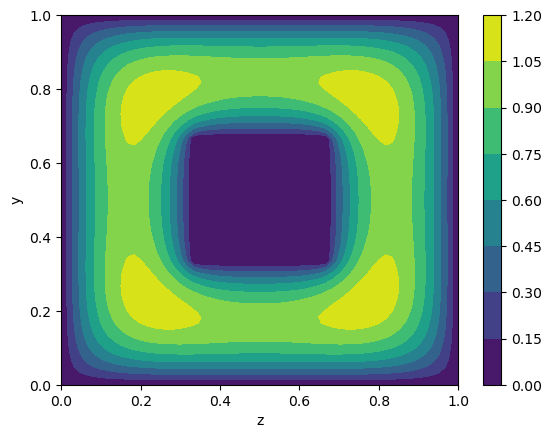

In [22]:
# Wir öfnnen eine Abbildung
plt.figure()
# mit der Funktion plt.contourf stellen wir 
# das Ergebnis dar. Achten Sie darauf, dass
# der Lösungsvektor zurück zu einer 2D-Matrix
# transformiert werden soll. Das können Sie
# mit der Methode .reshape von jedem 
# numpy array erreichen. 
plt.contourf(z,y,u.reshape(Ny,Nz))
# Wir zeigen die Colorbar
plt.colorbar()
# und beschriften die Achsen
plt.xlabel('z')
plt.ylabel('y')
plt.show()